In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


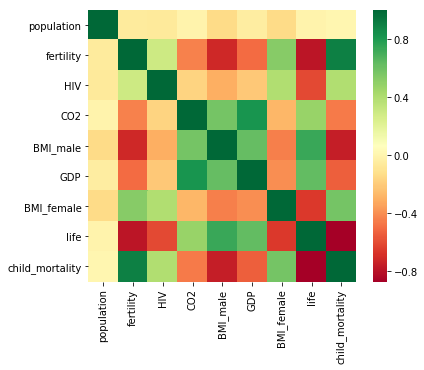

In [19]:
matrix = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(matrix, cmap="RdYlGn")
plt.show()

In [40]:
# Linear Regression for one feature
x1 = df["fertility"].values.reshape(-1,1)
y = df["life"].values.reshape(-1,1)

linear = LinearRegression()
cross_val_score(linear, x, y, cv=5)

array([0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637])

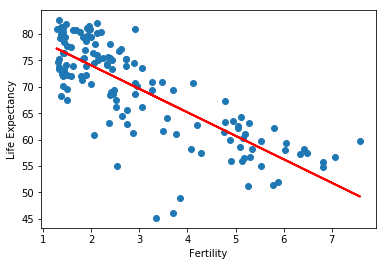

In [51]:
# Plot linear Regression
plt.scatter(x1, y)
linear.fit(x1, y)
y_pred = linear.predict(x1)
plt.plot(x1, y_pred, color='red', linewidth=2)
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.show()

In [38]:
# Linear Regression for all features
x2 = df[["fertility", "population", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]].values
y = df["life"].values.reshape(-1,1)

linear_all = LinearRegression()
cross_val_score(linear_all, x2, y, cv=5)

array([0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637])

The version of linear regression which implements all features to predict life expectancy performs significantly better than the single variable model due to the fact that fertility has a low correlation to life expectancy compared to some of the other features.